## 0. Installation

In [ ]:
try:
    from kiara_plugin.jupyter import ensure_kiara_plugins
except:
    import sys
    print("Installing 'kiara_plugin.jupyter'...")
    !{sys.executable} -m pip install -q kiara_plugin.jupyter
    from kiara_plugin.jupyter import ensure_kiara_plugins

import sys
!{sys.executable} -m pip install kiara_plugin.language_processing==0.4.13

ensure_kiara_plugins()

from kiara.api import KiaraAPI
kiara = KiaraAPI.instance()

## 1. Data onboarding

### 1.1. Download text file bundle into dataframe

In [2]:
inputs = {
    "url": "https://github.com/DHARPA-Project/kiara.examples/archive/refs/heads/main.zip",
    "sub_path": "kiara.examples-main/examples/data/language_processing/text_corpus/data"
 }

outputs = kiara.run_job('download.file_bundle', inputs=inputs)
outputs

patool: Extracting /var/folders/tj/r4cwnnd565198682m31h3qyj_70jlk/T/tmpaxet_hat ...
patool: ... /var/folders/tj/r4cwnnd565198682m31h3qyj_70jlk/T/tmpaxet_hat extracted to `/var/folders/tj/r4cwnnd565198682m31h3qyj_70jlk/T/tmprvyel3c9'.


╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field               value                                                                                                              │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   download_metadata                                                                                                                      │
│                         dict data     {                                                                                                  │
│                                         "response_headers": [                                                                            │
│                                           {                                                                                              │
│                                             "access-control-allow-origin": "https://render.githubusercontent.com",                       │
│                                             "content-disposition": "attachment; filename=kiara.examples-main.zip",                       │
│                                             "content-security-policy": "default-src 'none'; style-src 'unsafe-inline'; sandbox",         │
│                                             "content-type": "application/zip",                                                           │
│                                             "etag": "W/\"37f3cc82f8fa3290f5034ef218f9db7cfedb2ec0861716a41ac279d07c7b6d66\"",            │
│                                             "strict-transport-security": "max-age=31536000",                                             │
│                                             "vary": "Authorization,Accept-Encoding,Origin",                                              │
│                                             "x-content-type-options": "nosniff",                                                         │
│                                             "x-frame-options": "deny",                                                                   │
│                                             "x-xss-protection": "1; mode=block",                                                         │
│                                             "date": "Wed, 10 May 2023 13:16:07 GMT",                                                     │
│                                             "transfer-encoding": "chunked",                                                              │
│                                             "x-github-request-id": "C95B:DCFE:8D2B13:AB29F0:645B9917"                                    │
│                                           },                                                                                             │
│                                           {                                                                                              │
│                                             "server": "GitHub.com",                                                                      │
│                                             "date": "Wed, 10 May 2023 13:16:06 GMT",                                                     │
│                                             "content-type": "text/html; charset=utf-8",                                                  │
│                                             "vary": "X-PJAX, X-PJAX-Container, Turbo-Visit, Turbo-Frame, Accept-Encoding, Accept, X…     │
│                                             "location": "https://codeload.github.com/DHARPA-Project/kiara.examples/zip/refs/heads/m…     │
│                                             "cache

In [3]:
file_bundle = outputs['file_bundle']

In [4]:
kiara.retrieve_operation_info('create.table.from.file_bundle')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         tabular                                                                                                   
                     Labels       package: kiara_plugin.tabular                                                                             
                     References   source_repo: ]8;id=912360;https://github.com/DHARPA-Project/kiara_plugin.tabular\https://github.com/DHARPA-Project/kiara_plugin.tabular]8;;\                                       
                                  documentation: ]8;id=407620;https://DHARPA-Project.github.io/kiara_plugin.tabular/\https://DHARPA-Project.github.io/kiara_plugin.tabular/]8;;\                                     
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Create a table value from a text file_bundle.                                                          
                                                                                                                                            
                                     The resulting table will have (at a minimum) the following collumns:                                   
                                     - id: an auto-assigned index                                                                           
                                     - rel_path: the relative path of the file (from the provided base path)                                
                                     - content: the text file content                                                                       
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type          description                              Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       file_bundle   file_bundle   The source value (of type                yes        -- no default --     
                                                                   'file_bundle').                                                          
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name   type    description                                                                     
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       t

In [5]:
inputs = {
    'file_bundle' : file_bundle
}

outputs = kiara.run_job('create.table.from.file_bundle', inputs=inputs)
outputs

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field   value                                                                                                                          │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   table                                                                                                                                  │
│             id   rel_path                        mime_type    size    content                          file_name                         │
│            ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│             0    La_Ragione/sn84037024_1917-04   text/plain   16613   LA RAGIONE                       sn84037024_1917-04-25_ed-1_se     │
│             1    La_Ragione/sn84037024_1917-04   text/plain   16679   LA RAG ONE                       sn84037024_1917-04-25_ed-2_se     │
│             2    La_Ragione/sn84037024_1917-04   text/plain   16793   LA RAGIONE                       sn84037024_1917-04-25_ed-3_se     │
│             3    La_Ragione/sn84037024_1917-04   text/plain   16235   contro i vili, i camorristi, i   sn84037024_1917-04-25_ed-4_se     │
│             4    La_Ragione/sn84037024_1917-05   text/plain   18346   contro i vili, i camorristi, i   sn84037024_1917-05-05_ed-1_se     │
│             5    La_Ragione/sn84037024_1917-05   text/plain   18474   LA RAGIONA                       sn84037024_1917-05-05_ed-2_se     │
│             6    La_Ragione/sn84037024_1917-05   text/plain   18280   LA RAGIONE                       sn84037024_1917-05-05_ed-3_se     │
│             7    La_Ragione/sn84037024_1917-05   text/plain   18481   LA RAGIONE                       sn84037024_1917-05-05_ed-4_se     │
│             8    La_Ragione/sn84037024_1917-05   text/plain   18620   contro i vili, i camorristi, i   sn84037024_1917-05-16_ed-1_se     │
│             9    La_Ragione/sn84037024_1917-05   text/plain   18698   LA RAG ONE                       sn84037024_1917-05-16_ed-2_se     │
│             10   La_Ragione/sn84037024_1917-05   text/plain   18540   contro 1 vili, i camorristi, i   sn84037024_1917-05-16_ed-3_se     │
│             11   La_Rassegna/sn84037025_1917-0   text/plain   19397   ■■■                              sn84037025_1917-04-07_ed-1_se     │
│             12   La_Rassegna/sn84037025_1917-0   text/plain   20647   La Rassegna                      sn84037025_1917-04-14_ed-1_se     │
│             13   La_Rassegna/sn84037025_1917-0   text/plain   20650   Both Phones                      sn84037025_1917-04-14_ed-2_se     │
│             14   La_Rassegna/sn84037025_1917-0   text/plain   21017   ■ jSrìt** W?? iIK 38®f- i^M      sn84037025_1917-04-21_ed-1_se     │
│             15   La_Rassegna/sn84037025_1917-0   text/plain   20982   ■Both Phones                     sn84037025_1917-04-21_ed-2_se     │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [6]:
kiara.retrieve_operation_info('get_lccn_metadata')

Author(s)                                                                                                                                  
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=90619;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=395047;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module will get metadata from strings that comply with LCCN pattern: '/sn86069873/1900-01-05/'    
                                     to get the publication references and the dates and add those informations as two new columns.         
                                                                                                                                            
                                     In addition, if a mapping scheme is provided between publication references and publication names,     
                                     it will add a column with the publication names.                                                       
                                     Such a map is provided in the form of a list of lists with publication references and publication      
                                     names in the same order.                                                                               
                                     Here is an example of how it should look:                                                              
                                     [["2012271201","sn85054967","sn93053873"],["Cronaca_Sovversiva","Il_Patriota","L'Indipendente"]]       
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type     description                                   Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table_input   table    The corpus for which we want to get           yes        -- no default --     
                                                              metadata from file names.                                                     
                                       column_name   string   The column containing metadata. In order to   yes        -- no default --     
                                                              work, file names need to comply with LCCN                                     
                         

In [7]:
inputs = {
    'table_input' : outputs['table'],
    'column_name' : 'rel_path',
    'map': [['2012271201','sn85054967','sn93053873','sn85066408','sn85055164','sn84037024','sn84037025','sn84020351','sn86092310','sn92051386'],['Cronaca_Sovversiva','Il_Patriota','L\'Indipendente','L\'Italia','La_Libera_Parola','La_Ragione','La_Rassegna','La_Sentinella','La_Sentinella_del_West','La_Tribuna_del_Connecticut']]
}

outputs = kiara.run_job('get_lccn_metadata', inputs=inputs)
outputs

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   table_output                                                                                                                           │
│                    id   rel_path         mime_type    size    content          file_name       date         pub_ref      pub_name        │
│                   ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                    0    La_Ragione/sn8   text/plain   16613   LA RAGIONE       sn84037024_19   1917-04-25   sn84037024   La_Ragione      │
│                    1    La_Ragione/sn8   text/plain   16679   LA RAG ONE       sn84037024_19   1917-04-25   sn84037024   La_Ragione      │
│                    2    La_Ragione/sn8   text/plain   16793   LA RAGIONE       sn84037024_19   1917-04-25   sn84037024   La_Ragione      │
│                    3    La_Ragione/sn8   text/plain   16235   contro i vili,   sn84037024_19   1917-04-25   sn84037024   La_Ragione      │
│                    4    La_Ragione/sn8   text/plain   18346   contro i vili,   sn84037024_19   1917-05-05   sn84037024   La_Ragione      │
│                    5    La_Ragione/sn8   text/plain   18474   LA RAGIONA       sn84037024_19   1917-05-05   sn84037024   La_Ragione      │
│                    6    La_Ragione/sn8   text/plain   18280   LA RAGIONE       sn84037024_19   1917-05-05   sn84037024   La_Ragione      │
│                    7    La_Ragione/sn8   text/plain   18481   LA RAGIONE       sn84037024_19   1917-05-05   sn84037024   La_Ragione      │
│                    8    La_Ragione/sn8   text/plain   18620   contro i vili,   sn84037024_19   1917-05-16   sn84037024   La_Ragione      │
│                    9    La_Ragione/sn8   text/plain   18698   LA RAG ONE       sn84037024_19   1917-05-16   sn84037024   La_Ragione      │
│                    10   La_Ragione/sn8   text/plain   18540   contro 1 vili,   sn84037024_19   1917-05-16   sn84037024   La_Ragione      │
│                    11   La_Rassegna/sn   text/plain   19397   ■■■              sn84037025_19   1917-04-07   sn84037025   La_Rassegna     │
│                    12   La_Rassegna/sn   text/plain   20647   La Rassegna      sn84037025_19   1917-04-14   sn84037025   La_Rassegna     │
│                    13   La_Rassegna/sn   text/plain   20650   Both Phones      sn84037025_19   1917-04-14   sn84037025   La_Rassegna     │
│                    14   La_Rassegna/sn   text/plain   21017   ■ jSrìt** W??    sn84037025_19   1917-04-21   sn84037025   La_Rassegna     │
│                    15   La_Rassegna/sn   text/plain   20982   ■Both Phones     sn84037025_19   1917-04-21   sn84037025   La_Rassegna     │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [8]:
kiara.retrieve_operation_info('get_text_stats')

Author(s)                                                                                                                                  
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=773309;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=116127;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module will add columns with words and characters count to a table containing text content.       
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type     description                                   Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table_input   table    The corpus for which we want to add words     yes        -- no default --     
                                                              and characters count.                                                         
                                       column_name   string   The column containing the text for which we   yes        -- no default --     
                                                              want the count.                                                               
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name     type    description                                                                   
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table_output   table   Augmented table containing words and characters count.                        
                                                                                                                                            
                  

In [9]:
inputs = {
    'table_input' : outputs['table_output'],
    'column_name' : 'content'
}

outputs = kiara.run_job('get_text_stats', inputs=inputs)
outputs

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   table_output                                                                                                                           │
│                    id   rel_path   mime_typ   size    content     file_nam   date        pub_ref    pub_name    chars_co   words_cou     │
│                   ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                    0    La_Ragio   text/pla   16613   LA RAGION   sn840370   1917-04-2   sn840370   La_Ragion   16495      2779          │
│                    1    La_Ragio   text/pla   16679   LA RAG ON   sn840370   1917-04-2   sn840370   La_Ragion   16576      2798          │
│                    2    La_Ragio   text/pla   16793   LA RAGION   sn840370   1917-04-2   sn840370   La_Ragion   16691      2832          │
│                    3    La_Ragio   text/pla   16235   contro i    sn840370   1917-04-2   sn840370   La_Ragion   16118      2773          │
│                    4    La_Ragio   text/pla   18346   contro i    sn840370   1917-05-0   sn840370   La_Ragion   18240      3166          │
│                    5    La_Ragio   text/pla   18474   LA RAGION   sn840370   1917-05-0   sn840370   La_Ragion   18365      3196          │
│                    6    La_Ragio   text/pla   18280   LA RAGION   sn840370   1917-05-0   sn840370   La_Ragion   18181      3127          │
│                    7    La_Ragio   text/pla   18481   LA RAGION   sn840370   1917-05-0   sn840370   La_Ragion   18333      3209          │
│                    8    La_Ragio   text/pla   18620   contro i    sn840370   1917-05-1   sn840370   La_Ragion   18506      3152          │
│                    9    La_Ragio   text/pla   18698   LA RAG ON   sn840370   1917-05-1   sn840370   La_Ragion   18585      3184          │
│                    10   La_Ragio   text/pla   18540   contro 1    sn840370   1917-05-1   sn840370   La_Ragion   18423      3114          │
│                    11   La_Rasse   text/pla   19397   ■■■         sn840370   1917-04-0   sn840370   La_Rasseg   19240      3253          │
│                    12   La_Rasse   text/pla   20647   La Rasseg   sn840370   1917-04-1   sn840370   La_Rasseg   20479      3531          │
│                    13   La_Rasse   text/pla   20650   Both Phon   sn840370   1917-04-1   sn840370   La_Rasseg   20497      3513          │
│                    14   La_Rasse   text/pla   21017   ■ jSrìt**   sn840370   1917-04-2   sn840370   La_Rasseg   20847      3614          │
│                    15   La_Rasse   text/pla   20982   ■Both Pho   sn840370   1917-04-2   sn840370   La_Rasseg   20825      3618          │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [17]:
# Exporting data table to pandas dataframe for visualization purposes
# This operation will not impact data operations as it is for display purposes only
table_obj = outputs['table_output'].data
arrow_table = table_obj.arrow_table
sources = arrow_table.to_pandas()

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(font_scale=.7)

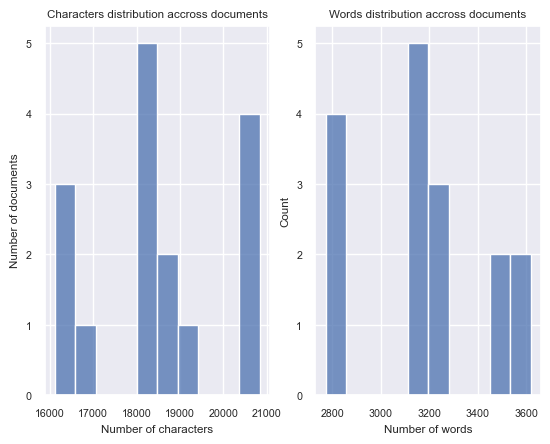

In [20]:
f, axes = plt.subplots(1, 2)
sns.histplot(sources.chars_count, bins=10, ax=axes[0]).set(title='Characters distribution accross documents', xlabel='Number of characters', ylabel='Number of documents')
sns.histplot(sources.words_count, bins=10, ax=axes[1]).set(title='Words distribution accross documents', xlabel='Number of words')
plt.show()

In [9]:
infos = metadata = kiara.retrieve_operations_info()
operations = {}
for op_id, info in infos.item_infos.items():
    if info.context.labels.get("package", None) == "kiara_plugin.language_processing":
        operations[op_id] = info

print(operations.keys())

dict_keys(['create.stopwords_list', 'generate.LDA.for.tokens_array', 'preprocess.tokens_array', 'tokenize.string', 'tokenize.texts_array'])


In [10]:
kiara.retrieve_operation_info('tokenize.texts_array')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing, tokenize, tokens                                                                     
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=528788;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=884091;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Split sentences into words or words into characters.                                                   
                                                                                                                                            
                                     In other words, this operation establishes the word boundaries (i.e., tokens) a very helpful way of    
                                     finding patterns. It is also the typical step prior to stemming and lemmatization                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name         type      description                             Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       texts_array        array     An array of text items to be            yes        -- no default --     
                                                                    tokenized.                                                              
                                       tokenize_by_word   boolean   Whether to tokenize by word             no         True                 
                                                                    (default), or character.                                                
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name     type    description                                                                   
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                

In [47]:
inputs = {
    'texts_array': outputs['array']
}

outputs = kiara.run_job('tokenize.texts_array', inputs=inputs)
outputs

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────                               │
│   tokens_array                                                                                                                           │
│                    ['LA', 'RAGIONE', 'ORGANO', 'DI', 'DIFESA', 'DELLA', "ITALIANITÀ'", 'contro', '1 ...                                  │
│                    ['LA', 'RAG', 'ONE', 'contro', 'i', 'vili', ',', 'i', 'camorristi', ',', 'i', 's ...                                  │
│                    ['LA', 'RAGIONE', 'ORGANO', 'DI', 'DIFESA', 'DELLA', 'ITALIANITÀ', 'contro', 'i' ...                                  │
│                    ['contro', 'i', 'vili', ',', 'i', 'camorristi', ',', 'i', 'sicari', ',', 'i', 'f ...                                  │
│                    ['contro', 'i', 'vili', ',', 'i', 'camorristi', ',', 'i', 'sicari', ',', 'i', 'f ...                                  │
│                    ['LA', 'RAGIONA', 'ORGANO', 'DI', 'DIFESA', 'DELLA', 'ITALIANITÀ', 'contro', 'i' ...                                  │
│                    ['LA', 'RAGIONE', 'ORGANO', 'DI', 'DIFESA', 'DELLA', "ITALIANITÀ'", 'contro', 'i ...                                  │
│                    ['LA', 'RAGIONE', 'contro', 'i', 'vili', ',', '1', 'camorristi', ',', 'i', 'sica ...                                  │
│                    ['contro', 'i', 'vili', ',', 'i', 'camorristi', ',', 'i', 'sicari', ',', 'i', 'f ...                                  │
│                    ['LA', 'RAG', 'ONE', 'ORGANO', 'DI', 'DIFESA', 'DELLA', 'ITALIANITÀ', "''", 'con ...                                  │
│                    ['contro', '1', 'vili', ',', 'i', 'camorristi', ',', 'i', 'sicari', ',', 'i', 'f ...                                  │
│                    ['■■■', 'La', 'Rassegna', '_', 'I', 'Both', 'Phones', 'ANNO', 'L', 'No', '.', '1 ...                                  │
│                    ['La', 'Rassegna', 'Jjoth', 'Phones', 'ANNO', 'L', 'No', '.', '2', 'BASTA', '!', ...                                  │
│                    ['Both', 'Phones', 'ANNO', 'I', '.', 'No', '.', '2', 'BASTA', '!', '...', 'uà',  ...                                  │
│                    ['■', 'jSrìt', '*', '*', 'W', '?', '?', 'iIK', '38®f-', 'i^M', 'F', '<', '5É', ' ...                                  │
│                    ['■Both', 'Phones', 'ANNO', '11', '.', 'No', '.', '5', 'LE', 'COSE', 'A', 'POSTO ...                                  │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [48]:
kiara.retrieve_operation_info('preprocess.tokens_array')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing, tokens, preprocess                                                                   
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=497028;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=728927;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Preprocess lists of tokens, incl. lowercasing, remove special characers, etc.                          
                                                                                                                                            
                                     Lowercasing: Lowercase the words. This operation is a double-edged sword. It can be effective at       
                                     yielding potentially better results in the case of relatively small datasets or datatsets with a       
                                     high percentage of OCR mistakes. For instance, if lowercasing is not performed, the algorithm will     
                                     treat USA, Usa, usa, UsA, uSA, etc. as distinct tokens, even though they may all refer to the same     
                                     entity. On the other hand, if the dataset does not contain such OCR mistakes, then it may become       
                                     difficult to distinguish between homonyms and make interpreting the topics much harder.                
                                                                                                                                            
                                     Removing stopwords and words with less than three characters: Remove low information words. These      
                                     are typically words such as articles, pronouns, prepositions, conjunctions, etc. which are not         
                                     semantically salient. There are numerous stopword lists available for many, though not all,            
                                     languages which can be easily adapted to the individual researcher's needs. Removing words with less   
                                     than three characters may additionally remove many OCR mistakes. Both these operations have the dual   
                                     advantage of yielding more reliable results while reducing the size of the dataset, thus in turn       
                                     reducing the required processing power. This step can therefore hardly be considered optional in TM.   
                                                                                                                                            
                

In [49]:
kiara.retrieve_operation_info('create.stopwords_list')


Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing                                                                                       
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=17519;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=325796;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Create a list of stopwords from one or multiple sources.                                               
                                                                                                                                            
                                     This will download nltk stopwords if necessary, and merge all input lists into a single, sorted list   
                                     without duplicates.                                                                                    
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name   type   description                                      Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       languages    list   A list of languages, will be used to retrieve    no         -- no default --     
                                                           language-specific stopword from nltk.                                            
                                       stopwords    list   A list of additional, custom stopwords.          no         -- no default --     
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name       type   description                                                                  
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       stopwords_list   list   A sorted list of unique stopwords.                                           
                 

In [17]:
import pandas as pd
custom_stopword_list = list(pd.read_csv('stop_words.csv')['stopword'])

In [50]:
inputs = {
    "languages": ["italian", "english"],
    "stopwords": custom_stopword_list
}

stopwords_outputs = kiara.run_job('create.stopwords_list', inputs=inputs)
my_stopwords_list = stopwords_outputs['stopwords_list']
my_stopwords_list.data

ListModel(list_data=['Indiana', 'Not', 'Which', 'Who', 'a', 'ab', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'about', 'above', 'ac', 'accidenti', 'ad', 'adesso', 'af', 'affinche', 'after', 'again', 'against', 'agl', 'agli', 'ahime', 'ahimã¨', 'ahimè', 'ai', 'ain', 'al', 'alcuna', 'alcuni', 'alcuno', 'ali', 'alio', 'all', 'alla', 'alle', 'allo', 'allora', 'altre', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'am', 'ami', 'an', 'anche', 'ancho', 'anco', 'ancora', 'and', 'ani', 'anni', 'anno', 'ano', 'ansa', 'anticipo', 'any', 'aono', 'ap', 'ar', 'are', 'aren', "aren't", 'as', 'assai', 'at', 'attesa', 'attraverso', 'au', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avu

In [53]:
inputs = {
    'tokens_array': outputs['tokens_array'],
    'remove_stopwords' : my_stopwords_list,
    'to_lowercase': True,
    'remove_non_alpha': True,
    'remove_short_tokens': 2
}

outputs = kiara.run_job('preprocess.tokens_array', inputs=inputs)
outputs

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────                               │
│   tokens_array                                                                                                                           │
│                    ['ragione', 'organo', 'difesa', 'vili', 'camorristi', 'sicari', 'falsari', 'aust ...                                  │
│                    ['rag', 'vili', 'camorristi', 'sicari', 'falsari', 'austriacanti', 'nemici', 'pa ...                                  │
│                    ['ragione', 'organo', 'difesa', 'italianità', 'vili', 'camorristi', 'sicari', 'f ...                                  │
│                    ['vili', 'camorristi', 'sicari', 'falsari', 'austriacanti', 'nemici', 'patria',  ...                                  │
│                    ['vili', 'camorristi', 'sicari', 'falsari', 'austriacanti', 'nemici', 'patria',  ...                                  │
│                    ['ragiona', 'organo', 'difesa', 'italianità', 'vili', 'camorristi', 'sicari', 'f ...                                  │
│                    ['ragione', 'organo', 'difesa', 'vili', 'camorristi', 'sicari', 'falsari', 'aust ...                                  │
│                    ['ragione', 'vili', 'camorristi', 'sicari', 'falsari', 'austriacanti', 'nemici', ...                                  │
│                    ['vili', 'camorristi', 'sicari', 'falsari', 'austriacanti', 'nemici', 'patria',  ...                                  │
│                    ['rag', 'organo', 'difesa', 'italianità', 'vili', 'camorristi', 'sicari', 'falsa ...                                  │
│                    ['vili', 'camorristi', 'sicari', 'falsari', 'austriacanti', 'nemici', 'patria',  ...                                  │
│                    ['rassegna', 'phones', 'rassegna', 'colonia', 'risentita', 'necessità', 'giornal ...                                  │
│                    ['rassegna', 'jjoth', 'phones', 'arte', 'amo', 'andati', 'assistendo', 'colo', ' ...                                  │
│                    ['phones', 'quaiene', 'parie', 'uue', 'ama', 'maino', 'anelati', 'asaisienuo', ' ...                                  │
│                    ['jsrìt', 'iik', 'phones', 'cose', 'ibi', 'dicendo', 'insinuando', 'colonia', 'g ...                                  │
│                    ['phones', 'cose', 'dicendo', 'susurran', 'insinuando', 'colonia', 'gran', 'dose ...                                  │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [54]:
kiara.retrieve_operation_info('generate.LDA.for.tokens_array')


Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing, LDA, tokens                                                                          
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=419271;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=877442;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Perform Latent Dirichlet Allocation on a tokenized corpus.                                             
                                                                                                                                            
                                     This module computes models for a range of number of topics provided by the user.                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name          type      description                            Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       tokens_array        array     The text corpus.                       yes        -- no default --     
                                       num_topics_min      integer   The minimal number of topics.          no         7                    
                                       num_topics_max      integer   The max number of topics.              no         7                    
                                       compute_coherence   boolean   Whether to compute the coherence       no         False                
                                                                     score for each model.                                                  
                                       words_per_topic     integer   How many words per topic to put in     no         10                   
                                                                     the result model.                                                      
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                

In [55]:
inputs = {
    'tokens_array' : outputs['tokens_array']
}

outputs = kiara.run_job('generate.LDA.for.tokens_array', inputs=inputs)
outputs

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field             value                                                                                                                │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   coherence_map                                                                                                                          │
│                       dict data     {}                                                                                                   │
│                       dict schema   {                                                                                                    │
│                                       "title": "dict",                                                                                   │
│                                       "type": "object"                                                                                   │
│                                     }                                                                                                    │
│                                                                                                                                          │
│   coherence_table   -- none/not set --                                                                                                   │
│   topic_models                                                                                                                           │
│                       dict data     {                                                                                                    │
│                                       "7": [                                                                                             │
│                                         [                                                                                                │
│                                           0,                                                                                             │
│                                           "0.004*\"degenerato\" + 0.003*\"colonia\" + 0.003*\"figli\" + 0.003*\"mente\" + 0.003*\"g…     │
│                                         ],                                                                                               │
│                                         [                                                                                                │
│                                           1,                                                                                             │
│                                           "0.005*\"degenerato\" + 0.003*\"ragione\" + 0.003*\"colonia\" + 0.003*\"philadelphia\" + …     │
│                                         ],                                                                                               │
│                                         [                                                                                                │
│                                           2,                                                                                             │
│                                           "0.004*\"colonia\" + 0.004*\"ragione\" + 0.003*\"degenerato\" + 0.003*\"mente\" + 0.003*\…     │
│                                         ],                                                                                               │
│                                         [                                                                                                │
│                                           3,      

In [56]:
topics = outputs['topic_models']

topics.lineage

generate.LDA.for.tokens_array
├── input: compute_coherence (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
├── input: num_topics_max (integer) = d4747a80-feff-483e-855d-4842dfca50e1
├── input: num_topics_min (integer) = d4747a80-feff-483e-855d-4842dfca50e1
├── input: tokens_array (array) = 35095a9b-7501-4a59-9d5c-fff68307b0e5
│   └── preprocess.tokens_array
│       ├── input: remove_all_numeric (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
│       ├── input: remove_alphanumeric (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
│       ├── input: remove_non_alpha (boolean) = 7b7ea8d9-a281-447c-954b-7f3be27d7c09
│       ├── input: remove_short_tokens (integer) = 7f996ac0-574b-446a-8c1a-77f02b1ece93
│       ├── input: remove_stopwords (list) = 6213731b-2f17-4bfe-970d-69eea845ffe9
│       │   └── create.stopwords_list
│       │       ├── input: languages (list) = 44675ebd-d547-43c7-8628-af46fe1ebbdd
│       │       └── input: stopwords (list) = c683f099-c85b-4a22-a7b8-30efd6e1f86e
│       ├── input: to_lowercase (boolean) = 7b7ea8d9-a281-447c-954b-7f3be27d7c09
│       └── input: tokens_array (array) = 7e942f69-816a-4e77-838a-bd926a8827aa
│           └── preprocess.tokens_array
│               ├── input: remove_all_numeric (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
│               ├── input: remove_alphanumeric (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
│               ├── input: remove_non_alpha (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
│               ├── input: remove_short_tokens (integer) = 49ceb73c-386b-4094-88f9-083e01c03e4a
│               ├── input: remove_stopwords (list) = 6213731b-2f17-4bfe-970d-69eea845ffe9
│               │   └── create.stopwords_list
│               │       ├── input: languages (list) = 44675ebd-d547-43c7-8628-af46fe1ebbdd
│               │       └── input: stopwords (list) = c683f099-c85b-4a22-a7b8-30efd6e1f86e
│               ├── input: to_lowercase (boolean) = 7b7ea8d9-a281-447c-954b-7f3be27d7c09
│               └── input: tokens_array (array) = eb6d4f3e-eb06-4584-b580-8474f838a961
│                   └── preprocess.tokens_array
│                       ├── input: remove_all_numeric (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
│                       ├── input: remove_alphanumeric (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
│                       ├── input: remove_non_alpha (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
│                       ├── input: remove_short_tokens (integer) = 49ceb73c-386b-4094-88f9-083e01c03e4a
│                       ├── input: remove_stopwords (list) = 6213731b-2f17-4bfe-970d-69eea845ffe9
│                       │   └── create.stopwords_list
│                       │       ├── input: languages (list) = 44675ebd-d547-43c7-8628-af46fe1ebbdd
│                       │       └── input: stopwords (list) = c683f099-c85b-4a22-a7b8-30efd6e1f86e
│                       ├── input: to_lowercase (boolean) = d9d04809-8c71-4b66-93d0-d47a548dc507
│                       └── input: tokens_array (array) = a45ba97c-bcdd-4eba-96ba-212c46150813
│                           └── tokenize.texts_array
│                               ├── input: texts_array (array) = 685ef986-8185-4358-8e6d-c77188968a8c
│                               │   └── table.pick.column
│                               │       ├── input: column_name (string) = 2fc17865-ce37-477e-9f94-d9ea157ee6c3
│                               │       └── input: table (table) = f4deabdd-7ec1-42d7-b651-bb497e965b1f
│                               │           └── create.table
│                               │               └── input: file_bundle (file_bundle) = f333f8e3-2ec1-452e-ba2d-c0fd64fe2b24
│                               │                   └── download.file_bundle
│                               │                       ├── input: sub_path (string) = e7c55bce-5d79-4e89-823c-d70e598a61e1
│                               │                       └── input: url (string) = 70388a1e-372b-4d75-9217-440405ef3